STEP 1 — Load & Understand Data

In [1]:
import pandas as pd
# Load the dataset
file_path = "/Users/keerthanamallidi/Downloads/insurance.csv"
df = pd.read_csv(file_path)

# Basic understanding
print(df.head())       # First 5 rows

   Id   age gender   bmi  bloodpressure diabetic  children smoker     region  \
0   1  39.0   male  23.2             91      Yes         0     No  southeast   
1   2  24.0   male  30.1             87       No         0     No  southeast   
2   3   NaN   male  33.3             82      Yes         0     No  southeast   
3   4   NaN   male  33.7             80       No         0     No  northwest   
4   5   NaN   male  34.1            100       No         0     No  northwest   

     claim  
0  1121.87  
1  1131.51  
2  1135.94  
3  1136.40  
4  1137.01  


In [3]:
print(df.isnull().sum())  # Check for missing values

Id               0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64


In [5]:
# Fill numeric missing values
df['age'] = df['age'].fillna(df['age'].median())

# Fill categorical missing values
df['region'] = df['region'].fillna(df['region'].mode()[0])

# Verify no missing values remain
print(df.isnull().sum())

Id               0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64


STEP 2 — Exploratory Data Analysis (EDA)

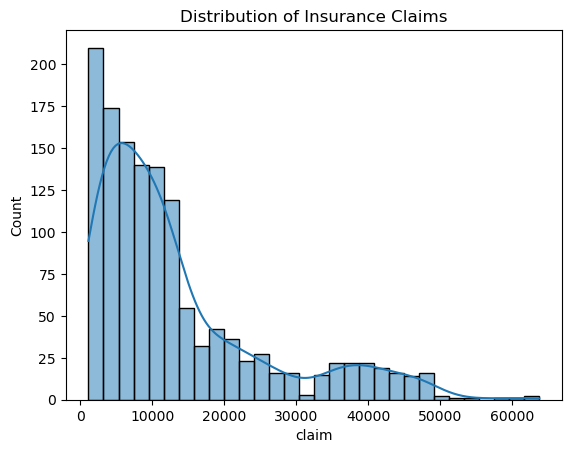

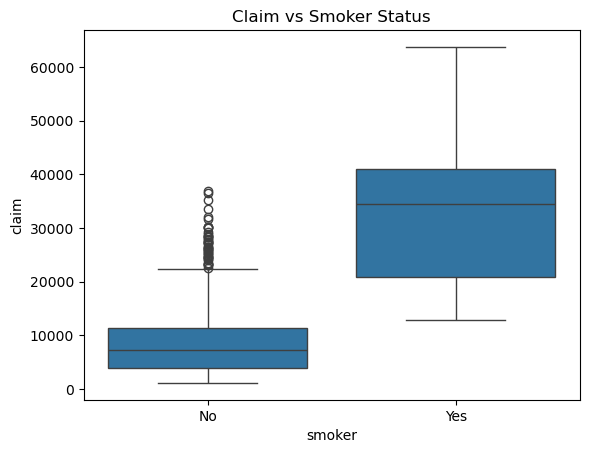

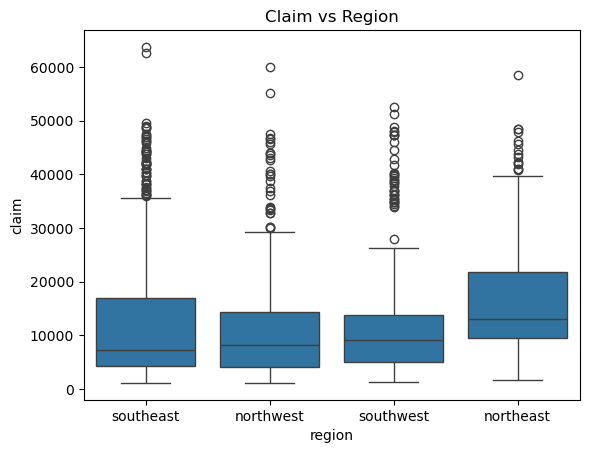

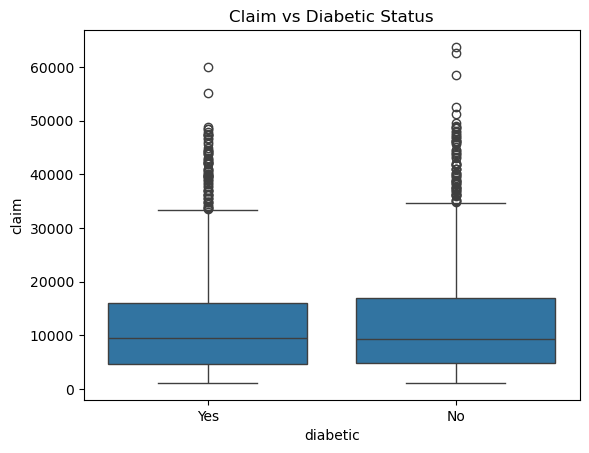

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of target variable
sns.histplot(df['claim'], kde=True)
plt.title("Distribution of Insurance Claims")
plt.show()

# Categorical variables vs target
sns.boxplot(x='smoker', y='claim', data=df)
plt.title("Claim vs Smoker Status")
plt.show()

sns.boxplot(x='region', y='claim', data=df)
plt.title("Claim vs Region")
plt.show()

sns.boxplot(x='diabetic', y='claim', data=df)
plt.title("Claim vs Diabetic Status")
plt.show()

Step 3 - Feature Engineering

In [9]:
# Convert categorical variables to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['gender', 'smoker', 'region', 'diabetic'], drop_first=True)

STEP 4 — Train/Test Split

In [11]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(['Id', 'claim'], axis=1)  # Features
y = df_encoded['claim']                       # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


STEP 5 — Modeling

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

STEP 6 — Evaluation

In [15]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import root_mean_squared_error  # New function in 1.4+

# Linear Regression
y_pred_lr = lr_model.predict(X_test)
rmse_lr = root_mean_squared_error(y_test, y_pred_lr)  # Updated
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("Linear Regression RMSE:", rmse_lr)
print("Linear Regression R2:", r2_lr)
print("Linear Regression MAE:", mae_lr)

# Random Forest
y_pred_rf = rf_model.predict(X_test)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)  # Updated
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest RMSE:", rmse_rf)
print("Random Forest R2:", r2_rf)
print("Random Forest MAE:", mae_rf)

Linear Regression RMSE: 6538.767929084114
Linear Regression R2: 0.7397673787147888
Linear Regression MAE: 4891.712143730636
Random Forest RMSE: 5421.305033146385
Random Forest R2: 0.8211134961745707
Random Forest MAE: 4017.5844473880593


#Interpretation for above step:

RMSE (Root Mean Squared Error):
Measures average prediction error in the same units as your target (claim).
Lower is better.
Random Forest (5421) < Linear Regression (6539) → Random Forest predicts claims more accurately.

R² (Coefficient of Determination):
Explains how much variance in claim is captured by the model.
Random Forest R² = 0.82 → ~82% of the variation in claims is explained.
Linear Regression R² = 0.74 → slightly worse.

MAE (Mean Absolute Error):
Average absolute difference between predicted and actual claims.
Again, Random Forest MAE = 4017 < Linear Regression MAE = 4892, confirming RF is better.